In [1]:
!pip install --quiet -r requirements.txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Expanded_Solar_Energy_Data.csv')

In [4]:
df

,TotalKwhConsumo,DataDeInicio,UltimaDataColetada,ValorGastoEmReais,ValorInstalacaoSolar,QuantidadeMeses,MediaMensalGasto,MesesParaLucro
0,2498.160475,2023-02-01,2024-02-01,1623.804309,15000.0,11,147.618574,101.613230
1,4802.857226,2023-08-01,2024-12-01,3121.857197,15000.0,2,1560.928598,9.609664
2,3927.975767,2023-09-01,2024-06-01,2553.184249,15000.0,1,2553.184249,5.875017
3,3394.633937,2023-01-01,2024-09-01,2206.512059,15000.0,6,367.752010,40.788356
4,1624.074562,2023-06-01,2024-08-01,1055.648465,15000.0,12,87.970705,170.511307
...,...,...,...,...,...,...,...,...
99995,4169.219323,2023-03-01,2024-04-01,2709.992560,15000.0,10,270.999256,55.350705
99996,4117.011581,2023-03-01,2024-05-01,2676.057527,15000.0,10,267.605753,56.052607
99997,3697.813629,2023-03-01,2024-08-01,2403.578859,15000.0,11,218.507169,68.647633
99998,2997.788979,2023-03-01,2024-03-01,1948.562836,15000.0,4,487.140709,30.791925


In [5]:
df[df.select_dtypes(include=['float', 'int']).columns] = df.select_dtypes(include=['float', 'int']).round(0)

df

,TotalKwhConsumo,DataDeInicio,UltimaDataColetada,ValorGastoEmReais,ValorInstalacaoSolar,QuantidadeMeses,MediaMensalGasto,MesesParaLucro
0,2498.0,2023-02-01,2024-02-01,1624.0,15000.0,11,148.0,102.0
1,4803.0,2023-08-01,2024-12-01,3122.0,15000.0,2,1561.0,10.0
2,3928.0,2023-09-01,2024-06-01,2553.0,15000.0,1,2553.0,6.0
3,3395.0,2023-01-01,2024-09-01,2207.0,15000.0,6,368.0,41.0
4,1624.0,2023-06-01,2024-08-01,1056.0,15000.0,12,88.0,171.0
...,...,...,...,...,...,...,...,...
99995,4169.0,2023-03-01,2024-04-01,2710.0,15000.0,10,271.0,55.0
99996,4117.0,2023-03-01,2024-05-01,2676.0,15000.0,10,268.0,56.0
99997,3698.0,2023-03-01,2024-08-01,2404.0,15000.0,11,219.0,69.0
99998,2998.0,2023-03-01,2024-03-01,1949.0,15000.0,4,487.0,31.0


In [6]:
df.describe()

,TotalKwhConsumo,ValorGastoEmReais,ValorInstalacaoSolar,QuantidadeMeses,MediaMensalGasto,MesesParaLucro
count,100000.000000,100000.000000,100000.0,100000.00000,100000.000000,100000.000000
mean,2997.952770,1948.670910,15000.0,6.49196,503.246280,60.284740
std,1153.363705,749.687987,0.0,3.44339,558.385591,45.951855
min,1000.000000,650.000000,15000.0,1.00000,54.000000,5.000000
25%,1998.000000,1299.000000,15000.0,4.00000,190.000000,27.000000
50%,3002.500000,1952.000000,15000.0,6.00000,299.000000,50.000000
75%,3998.000000,2599.000000,15000.0,9.00000,558.000000,79.000000
max,5000.000000,3250.000000,15000.0,12.00000,3250.000000,277.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TotalKwhConsumo       100000 non-null  float64
 1   DataDeInicio          100000 non-null  object 
 2   UltimaDataColetada    100000 non-null  object 
 3   ValorGastoEmReais     100000 non-null  float64
 4   ValorInstalacaoSolar  100000 non-null  float64
 5   QuantidadeMeses       100000 non-null  int64  
 6   MediaMensalGasto      100000 non-null  float64
 7   MesesParaLucro        100000 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.1+ MB


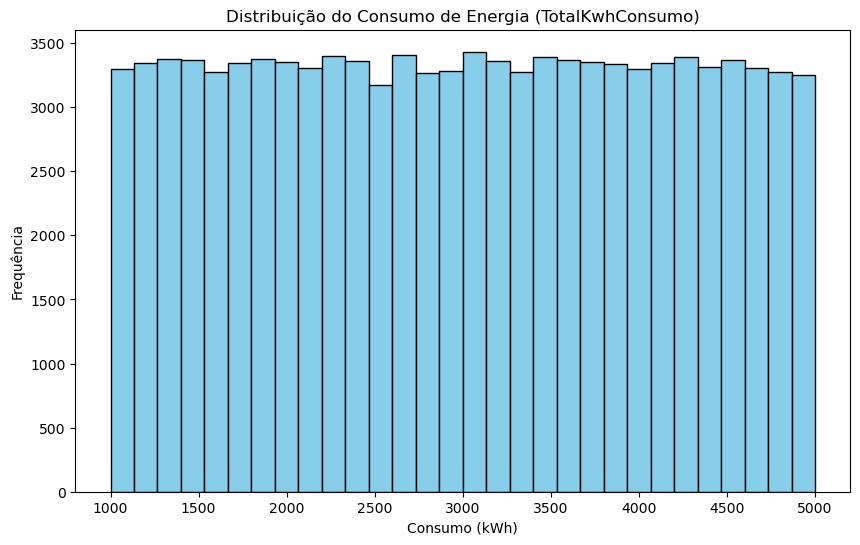

In [8]:
# Gráfico de distribuição de consumo de energia
plt.figure(figsize=(10, 6))
plt.hist(df['TotalKwhConsumo'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do Consumo de Energia (TotalKwhConsumo)')
plt.xlabel('Consumo (kWh)')
plt.ylabel('Frequência')
plt.show()


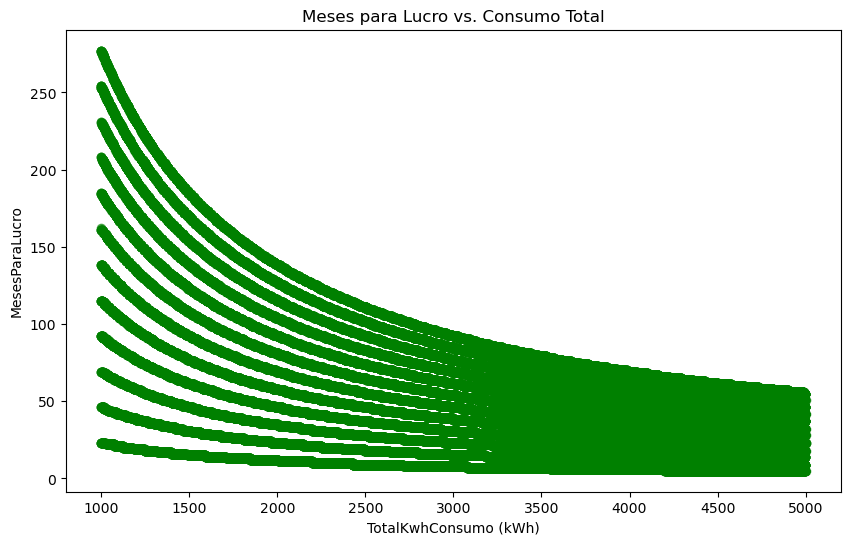

In [9]:
# Gráfico de meses até o lucro em relação ao consumode Kwh
plt.figure(figsize=(10, 6))
plt.scatter(df['TotalKwhConsumo'], df['MesesParaLucro'], alpha=0.6, color='green')
plt.title('Meses para Lucro vs. Consumo Total')
plt.xlabel('TotalKwhConsumo (kWh)')
plt.ylabel('MesesParaLucro')
plt.show()


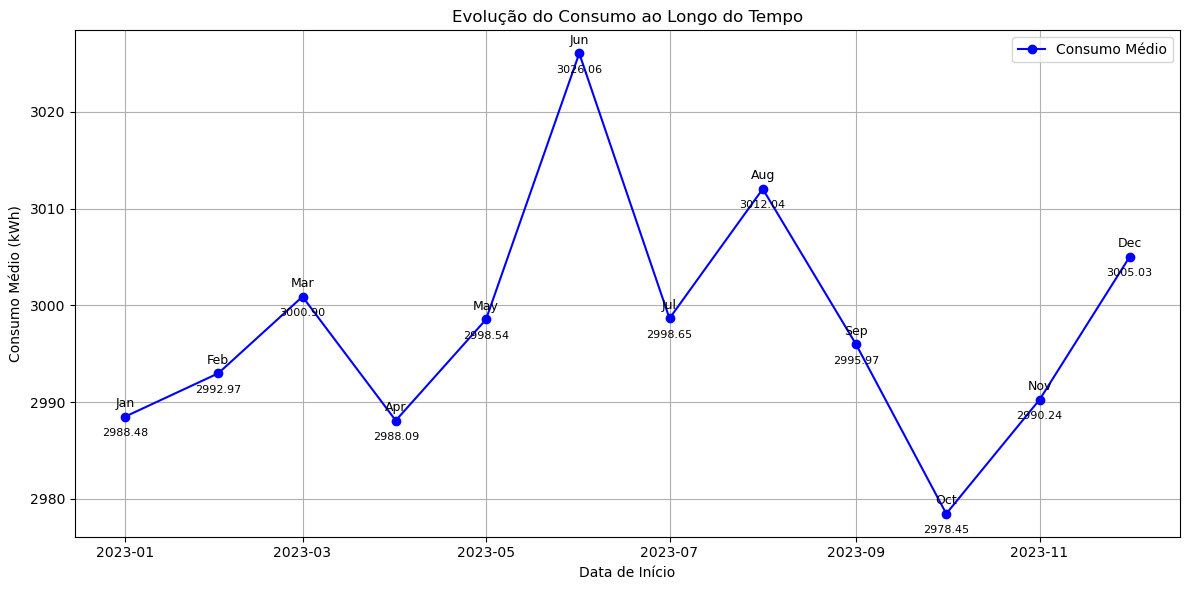

In [10]:
df['DataDeInicio'] = pd.to_datetime(df['DataDeInicio'])

mean_consumption_over_time = df.groupby('DataDeInicio')['TotalKwhConsumo'].mean()

plt.figure(figsize=(12, 6))
plt.plot(mean_consumption_over_time.index, mean_consumption_over_time.values, marker='o', color='blue', label='Consumo Médio')

for i, value in enumerate(mean_consumption_over_time):
    month_abbr = mean_consumption_over_time.index[i].strftime('%b')
    plt.text(mean_consumption_over_time.index[i], value + 1, month_abbr, ha='center', fontsize=9)

for i, value in enumerate(mean_consumption_over_time):
    plt.text(mean_consumption_over_time.index[i], value - 2, f'{value:.2f}', ha='center', fontsize=8, color='black')

plt.title('Evolução do Consumo ao Longo do Tempo')
plt.xlabel('Data de Início')
plt.ylabel('Consumo Médio (kWh)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
X = df.drop(columns=['DataDeInicio', 'UltimaDataColetada', 'ValorInstalacaoSolar', 'MediaMensalGasto', 'MesesParaLucro'])
y = df['MesesParaLucro']

In [13]:
X

,TotalKwhConsumo,ValorGastoEmReais,QuantidadeMeses
0,2498.0,1624.0,11
1,4803.0,3122.0,2
2,3928.0,2553.0,1
3,3395.0,2207.0,6
4,1624.0,1056.0,12
...,...,...,...
99995,4169.0,2710.0,10
99996,4117.0,2676.0,10
99997,3698.0,2404.0,11
99998,2998.0,1949.0,4


In [14]:
y

0        102.0
1         10.0
2          6.0
3         41.0
4        171.0
         ...  
99995     55.0
99996     56.0
99997     69.0
99998     31.0
99999    108.0
Name: MesesParaLucro, Length: 100000, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print(f'Acurácia: {(r2_score(y_test, y_pred)*100):.2F}%')

MSE: 0.011784282298083601
Acurácia: 100.00%
